In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubh9372","key":"7168f9ae03f5603adc7a4edb1b79fa50"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 38% 13.0M/34.1M [00:00<00:00, 132MB/s]
100% 34.1M/34.1M [00:00<00:00, 191MB/s]


In [ ]:
!mkdir data
!unzip  alzheimers-dataset-4-class-of-images.zip -d data

usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
       ...
kaggle: error: argument command: invalid choice: 'Mri-image-dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


              Class  Num_Images  Mean_Height  Mean_Width  Min_Height  \
0      MildDemented         717        208.0       176.0         208   
1  ModerateDemented          52        208.0       176.0         208   
2       NonDemented        2560        208.0       176.0         208   
3  VeryMildDemented        1792        208.0       176.0         208   

   Min_Width  Max_Height  Max_Width  
0        176         208        176  
1        176         208        176  
2        176         208        176  
3        176         208        176  


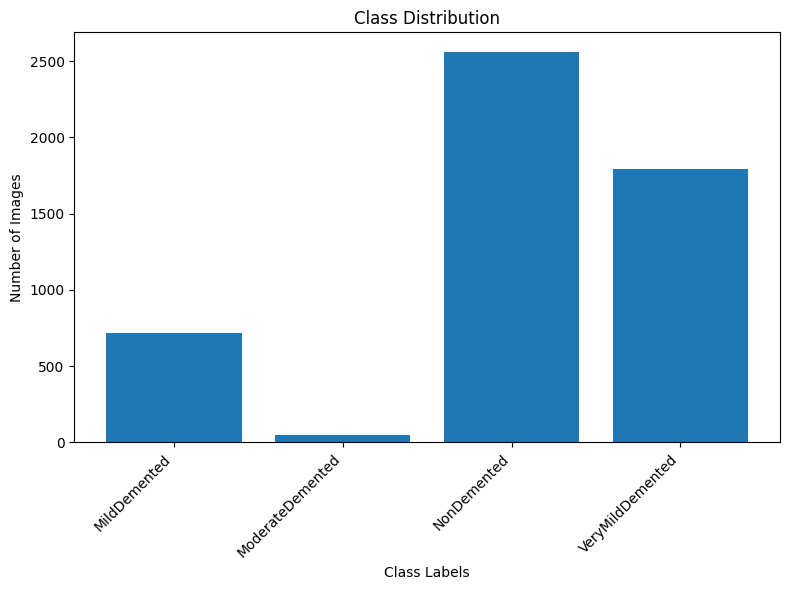

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the dataset directory
data_directory = '/content/data/Alzheimer_s Dataset/train'  # Update with the actual path to your dataset

# Function to load the dataset and extract image statistics
def get_image_stats(data_dir):
    class_labels = ['MildDemented', 'ModerateDemented', 'NonDemented','VeryMildDemented']
    image_stats = []

    for label in class_labels:
        class_dir = os.path.join(data_dir, label)
        num_images = len(os.listdir(class_dir))
        image_sizes = []


        for image_file in os.listdir(class_dir):

            if image_file.endswith(".jpg"):
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                height, width = image.shape
                image_sizes.append((height, width))

        image_sizes = np.array(image_sizes)
        mean_height, mean_width = np.mean(image_sizes, axis=0)
        min_height, min_width = np.min(image_sizes, axis=0)
        max_height, max_width = np.max(image_sizes, axis=0)

        image_stats.append({
            'Class': label,
            'Num_Images': num_images,
            'Mean_Height': mean_height,
            'Mean_Width': mean_width,
            'Min_Height': min_height,
            'Min_Width': min_width,
            'Max_Height': max_height,
            'Max_Width': max_width
        })

    return image_stats

# Get data summary
data_summary = get_image_stats(data_directory)

# Convert data summary to a pandas DataFrame for easier visualization
data_summary_df = pd.DataFrame(data_summary)

# Display the data summary
print(data_summary_df)

# Plot bar chart for class distribution
plt.figure(figsize=(8, 6))
plt.bar(data_summary_df['Class'], data_summary_df['Num_Images'])
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

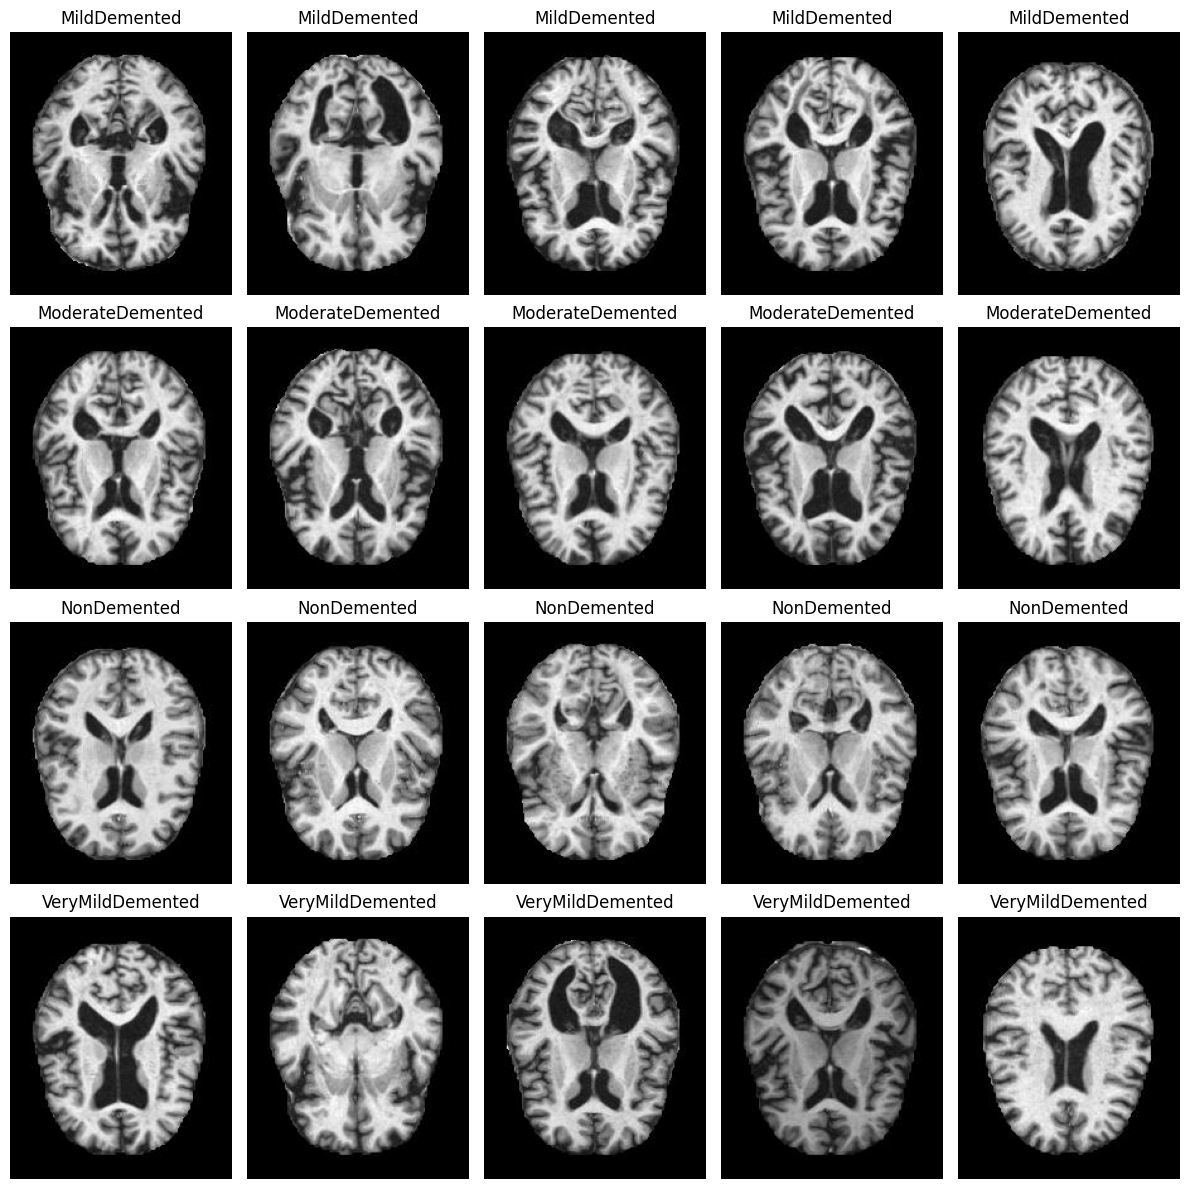

In [ ]:
data_directory = '/content/data/Alzheimer_s Dataset/train'
def load_sample_images(data_dir, num_samples=5):
    class_labels = ['MildDemented', 'ModerateDemented', 'NonDemented','VeryMildDemented']
    sample_images = []

    for label in class_labels:
        class_dir = os.path.join(data_dir, label)
        image_files = os.listdir(class_dir)
        sample_files = np.random.choice(image_files, num_samples, replace=False)

        for image_file in sample_files:
            if image_file.endswith(".jpg"):
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                sample_images.append((label, image))

    return sample_images

# Load sample X-ray images
num_samples_per_class = 5
sample_images = load_sample_images(data_directory, num_samples=num_samples_per_class)

fig, axes = plt.subplots(len(sample_images) // num_samples_per_class, num_samples_per_class, figsize=(12, 12))
for i, (label, image) in enumerate(sample_images):
    row = i // num_samples_per_class
    col = i % num_samples_per_class
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(label)

# Display the plot
plt.tight_layout()
plt.show()

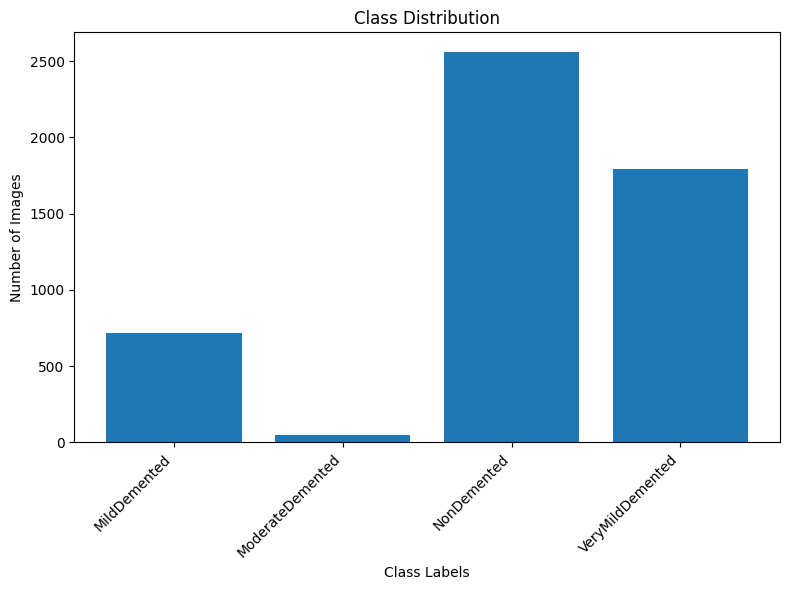

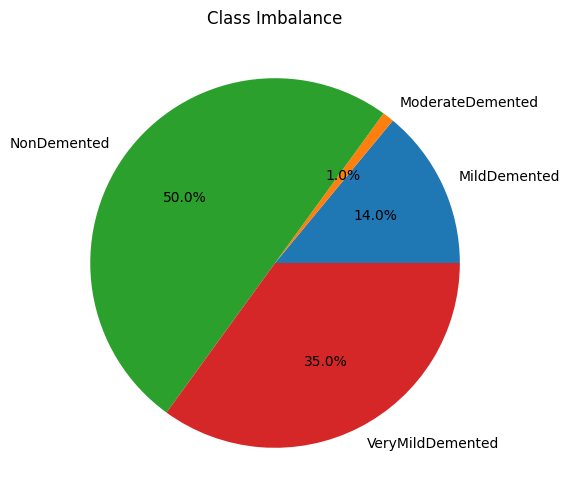

In [ ]:
# Calculate class distribution and visualize class imbalance
class_labels = ['MildDemented', 'ModerateDemented', 'NonDemented','VeryMildDemented']
num_images_per_class = [len(os.listdir(os.path.join(data_directory, label))) for label in class_labels]

# Plot bar chart for class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, num_images_per_class)
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize class imbalance (if any) with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(num_images_per_class, labels=class_labels, autopct='%1.1f%%')
plt.title('Class Imbalance')
plt.show()

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Data Preprocessing: Resizing
image_size = (128, 128)  # Choose the desired image size for resizing

def resize_images(data_dir, image_size):
    X, y = [], []
    class_labels = ['MildDemented', 'ModerateDemented', 'NonDemented','VeryMildDemented']
    for i, label in enumerate(class_labels):
        class_dir = os.path.join(data_dir, label)
        for image_file in os.listdir(class_dir):
             if image_file.endswith(".jpg"):

                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, image_size)
                X.append(image)
                y.append(i)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Load and preprocess the data
data_directory='/content/data/Alzheimer_s Dataset/train'
X, y = resize_images(data_directory, image_size)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
# Data Augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert the class labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Check the data shapes after preprocessing and augmentation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4096, 128, 128)
y_train shape: (4096, 4)
X_test shape: (1025, 128, 128)
y_test shape: (1025, 4)


In [ ]:
X.shape, y.shape

((5121, 128, 128), (5121,))

In [ ]:
X_train.shape, y_train.shape

((4096, 128, 128), (4096, 4))

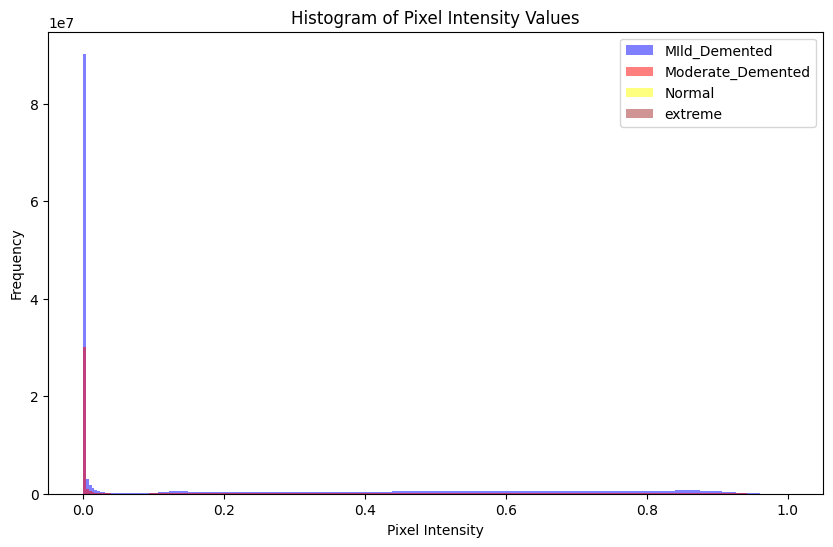

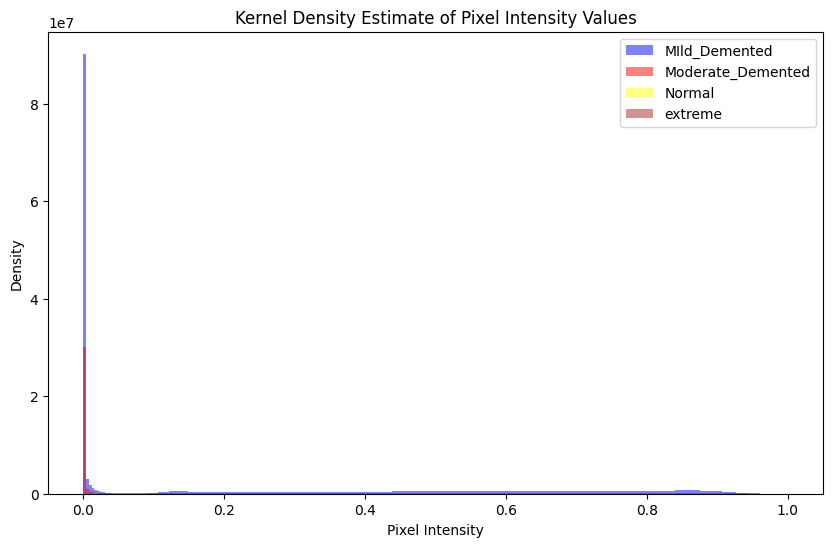

In [ ]:
y_train = np.squeeze(y_train)
y_train = y_train.astype(int)

milddemented_indices = np.where(y_train == 0)[0]
moderatedemeneted_indices = np.where(y_train == 1)[0]
nonDemented_indices = np.where(y_train == 2)[0]
verymilddement_indices = np.where(y_train == 2)[0]

milddemented = X_train[milddemented_indices]
moderatedemeneted_images = X_train[moderatedemeneted_indices]
nonDemented_images = X_train[nonDemented_indices]
verymilddement_images = X_train[verymilddement_indices]

# Plot histograms of pixel intensity values
plt.figure(figsize=(10, 6))
plt.hist(milddemented.flatten(), bins=256, alpha=0.5, label='MIld_Demented', color='blue')
plt.hist(moderatedemeneted_images.flatten(), bins=256, alpha=0.5, label='Moderate_Demented', color='red')
plt.hist(nonDemented_images.flatten(), bins=256, alpha=0.5, label='Normal', color='yellow')
plt.hist(verymilddement_images.flatten(), bins=256, alpha=0.5, label='extreme', color='brown')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity Values')
plt.legend()
plt.show()

# Alternatively, you can plot kernel density estimates (KDE)
plt.figure(figsize=(10, 6))
plt.hist(milddemented.flatten(), bins=256, alpha=0.5, label='MIld_Demented', color='blue')
plt.hist(moderatedemeneted_images.flatten(), bins=256, alpha=0.5, label='Moderate_Demented', color='red')
plt.hist(nonDemented_images.flatten(), bins=256, alpha=0.5, label='Normal', color='yellow')
plt.hist(verymilddement_images.flatten(), bins=256, alpha=0.5, label='extreme', color='brown')

plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Pixel Intensity Values')
plt.legend()
plt.show()